## Travel Insurance Claims

### Buisness problem : A third-party travel insurance servicing company that is based in Singapore, they want                                          to predict which customer claim should accept or decline according to their records                                              on insurance list. 

#### The attributes:

1. Target: Claim Status (Claim.Status)
2. Name of agency (Agency)
3. Type of travel insurance agencies (Agency.Type)
4. Distribution channel of travel insurance agencies (Distribution.Channel)
5. Name of the travel insurance products (Product.Name)
6. Duration of travel (Duration)
7. Destination of travel (Destination)
8. Amount of sales of travel insurance policies (Net.Sales)
9. Commission received for travel insurance agency (Commission)
10. Gender of insured (Gender)
11. Age of insured (Age)


* SOURCE : https://www.kaggle.com/mhdzahier/travel-insurance

## Import neccesary libraries

In [1]:
import numpy as np # mathematical operations(linear algebra)
import pandas as pd # data processing, CSV file I/O

# for graphical presentation 
import matplotlib.pyplot as plt
import seaborn as sns

# for plots to apppear inside the notebook
%matplotlib inline 

# plot style
plt.style.use('fivethirtyeight')

# data preprocessing techniques 
from sklearn import preprocessing  

#missing values visualization
import missingno as mo

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.ensemble import RandomForestClassifier

# Model from xgboost
from xgboost import XGBClassifier

# Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score,plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
# Loading the dataset
df = pd.read_csv("Data/travel_insurance_claim.csv")
print("Shape of dataset : ", df.shape)

Shape of dataset :  (63326, 11)


## EDA (Exploratory Data Analysis)

* The goal here is to find out more about the data and become a subject matter export on the dataset we're working with.

In [3]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CBH,Travel Agency,Offline,Comprehensive Plan,186,MALAYSIA,-29.0,9.57,F,81,No
1,CBH,Travel Agency,Offline,Comprehensive Plan,186,MALAYSIA,-29.0,9.57,F,71,No
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,65,AUSTRALIA,-49.5,29.70,NaN,32,No
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,60,AUSTRALIA,-39.6,23.76,NaN,32,No
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,79,ITALY,-19.8,11.88,NaN,41,No


### Duplicate entries

In [4]:
# Checking for count of duplicate entries
df.duplicated().sum()

8042

> there are 8042 No. of duplicate entries found in our dataset.

So let's drop duplicate entries from our dataset

In [5]:
df = df.drop_duplicates(keep='first')

In [6]:
# Again checking for count of duplicate entries
df.duplicated().sum()

0

In [7]:
print("Shape of final dataset : ", df.shape)
df.head()

Shape of final dataset :  (55284, 11)


,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CBH,Travel Agency,Offline,Comprehensive Plan,186,MALAYSIA,-29.0,9.57,F,81,No
1,CBH,Travel Agency,Offline,Comprehensive Plan,186,MALAYSIA,-29.0,9.57,F,71,No
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,65,AUSTRALIA,-49.5,29.70,NaN,32,No
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,60,AUSTRALIA,-39.6,23.76,NaN,32,No
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,79,ITALY,-19.8,11.88,NaN,41,No


In [8]:
df.info() # checking information about variables in dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55284 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                55284 non-null  object 
 1   Agency Type           55284 non-null  object 
 2   Distribution Channel  55284 non-null  object 
 3   Product Name          55284 non-null  object 
 4   Duration              55284 non-null  int64  
 5   Destination           55284 non-null  object 
 6   Net Sales             55284 non-null  float64
 7   Commision (in value)  55284 non-null  float64
 8   Gender                16959 non-null  object 
 9   Age                   55284 non-null  int64  
 10  Claim                 55284 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 5.1+ MB


### Missing values

In [10]:
# Are there any missing values?
# let's check
df.isnull().sum() #only "Gender" variables has most missing/NA values

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  38325
Age                         0
Claim                       0
dtype: int64

<AxesSubplot:>

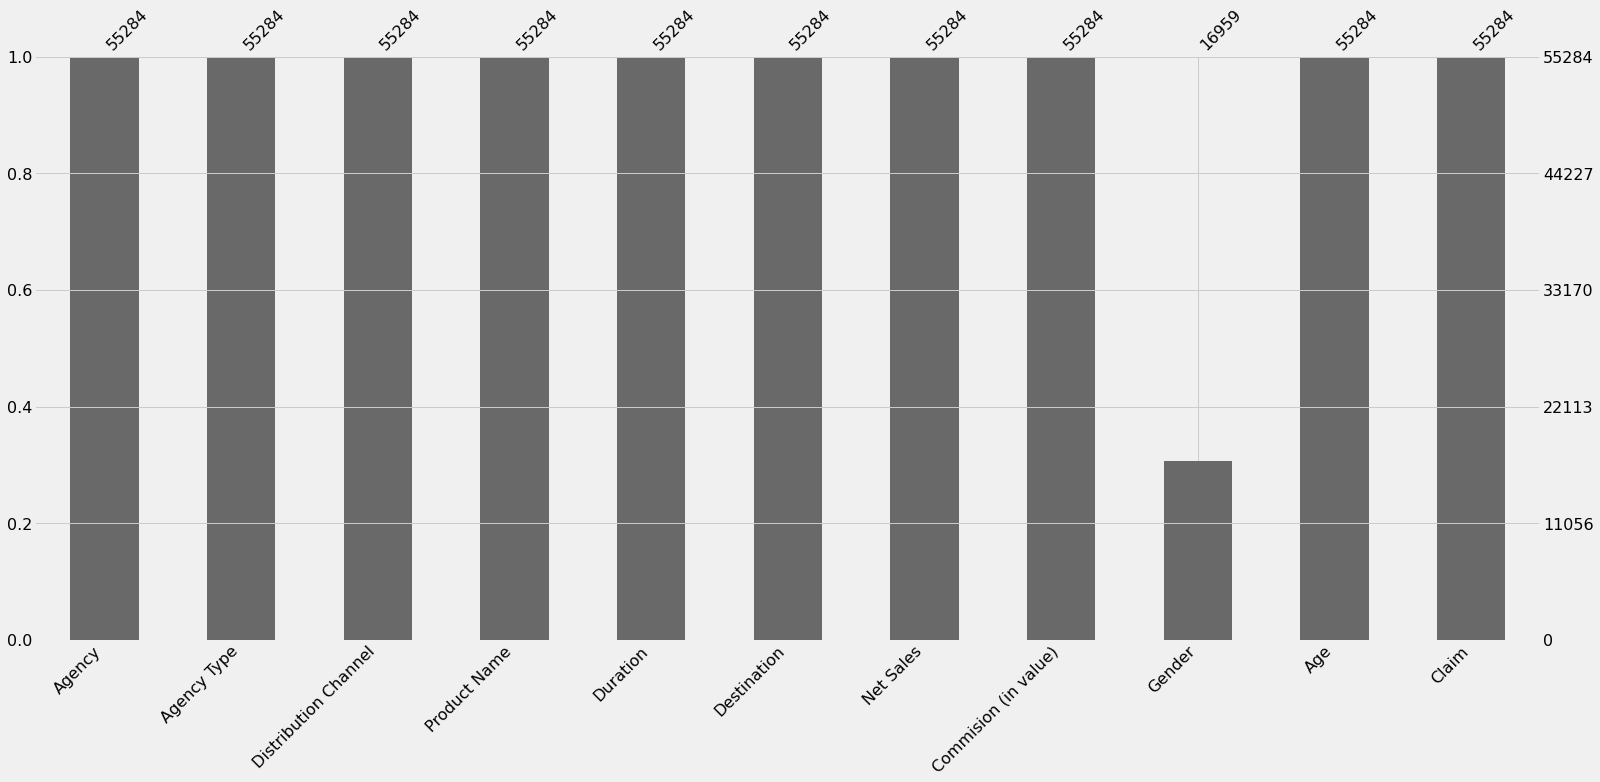

In [11]:
# Visualizing missing data in our dataframe.
mo.bar(df) 

In [12]:
df.isnull().mean() # check null values in %

Agency                  0.000000
Agency Type             0.000000
Distribution Channel    0.000000
Product Name            0.000000
Duration                0.000000
Destination             0.000000
Net Sales               0.000000
Commision (in value)    0.000000
Gender                  0.693239
Age                     0.000000
Claim                   0.000000
dtype: float64

In [13]:
# lets check "Gender" variable
df.Gender.value_counts()

M    8558
F    8401
Name: Gender, dtype: int64

> Looking up to our data, there is 69.32% null values in "Gender" variable it's hugh No. of missing value. If we fill with any missing method like mean, median, knn, etc. It will give only one value on "Gender" variable i.e.('Male' or 'Female').
So we have another solution that we will make new category "Not Specified" and let's fill NA values with our new category.

In [14]:
df.fillna('Not Specified',inplace=True)

In [15]:
df.Gender.value_counts()

Not Specified    38325
M                 8558
F                 8401
Name: Gender, dtype: int64

In [16]:
# let's check again is there any null values now?
df.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
Claim                   0
dtype: int64

> Great! We have done missing values part let's go for next step.

In [17]:
df.describe(include=['O']) # statastical summary of categorical variables

,Agency,Agency Type,Distribution Channel,Product Name,Destination,Gender,Claim
count,55284,55284,55284,55284,55284,55284,55284
unique,16,2,2,26,149,3,2
top,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE,Not Specified,No
freq,28956,39098,54232,15308,11539,38325,54363


In [18]:
df.describe() # statastical summary of numerical variables 

,Duration,Net Sales,Commision (in value),Age
count,55284.000000,55284.000000,55284.000000,55284.000000
mean,52.715035,42.788716,10.680707,39.977932
std,106.413615,50.448570,20.676708,13.509125
min,-2.000000,-389.000000,0.000000,0.000000
25%,11.000000,19.167500,0.000000,34.000000
50%,25.000000,29.000000,0.000000,36.000000
75%,57.000000,50.500000,11.880000,45.000000
max,4881.000000,810.000000,283.500000,118.000000


> Wait! "Duration" means time right? that means time cannot be negative but lookup there the min value in "Duration" variable is -2. So let's figure out this variable

In [19]:
# let's check how many negative values are there?
df_duration = df['Duration']<0
df_duration.sum()  # 5 values are negative

5

In [20]:
# now let's fill this negative values with mean of "Duration"
df.Duration.mean()

52.71503509152738

In [21]:
df.loc[df['Duration'] < 0, 'Duration'] = 52.715

In [22]:
df.Duration.describe()

count    55284.000000
mean        52.719911
std        106.412379
min          0.000000
25%         11.000000
50%         25.000000
75%         57.000000
max       4881.000000
Name: Duration, dtype: float64

In [23]:
# let's make new numerical columns frame

df_numerical = df._get_numeric_data()
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55284 entries, 0 to 63325
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Duration              55284 non-null  float64
 1   Net Sales             55284 non-null  float64
 2   Commision (in value)  55284 non-null  float64
 3   Age                   55284 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 2.1 MB


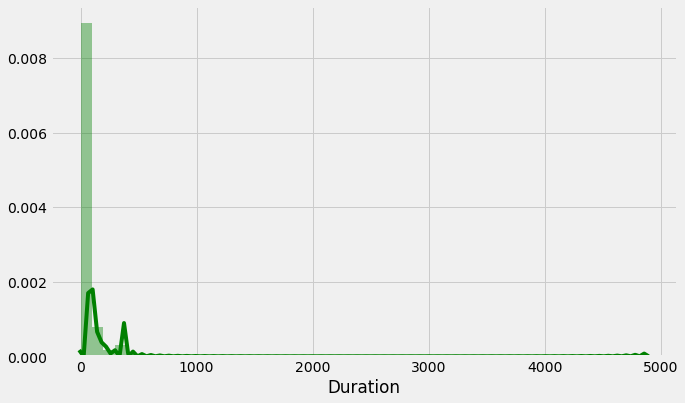

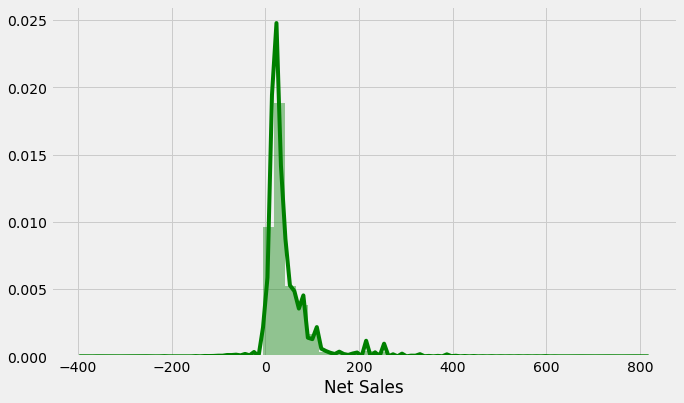

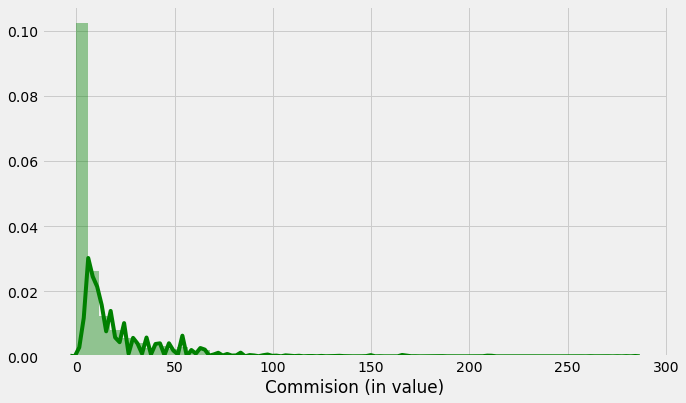

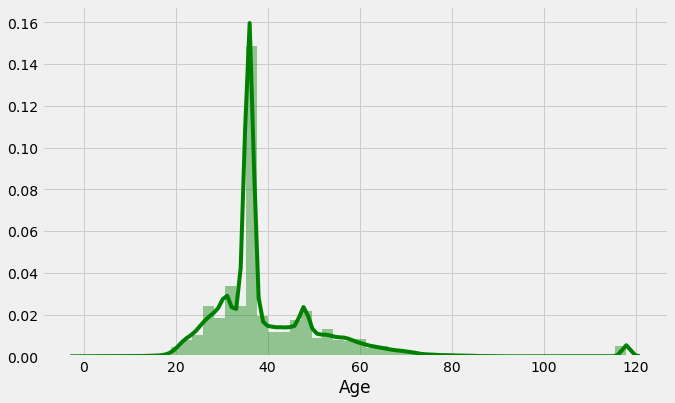

In [24]:
for i, col in enumerate(df_numerical.columns):
    plt.figure(figsize=(10,6))
    sns.distplot(df_numerical[col],color="g")

> From the graph we can conclude:
* Duration: Data in this column is highly right skewed.
* Net Sales and Commison: These both column seems to related but the graph plot shows disparency as low net sales shows high commison which is not pratically possible.
* Age: Age is random so its distribution can be random.

we have checked that some columns have low Net Sales but High Commison but thats not possible.

In [25]:
# Lets see how many such columns we have here

df_sales_commision = df['Net Sales'] < df['Commision (in value)']
df_sales_commision.sum()

1955

In [26]:
# We gonna make all comission value 0 where net sales is 0.

df.loc[df['Net Sales'] == 0.0, 'Commision (in value)'] = 0

In [27]:
print(df.Agency.value_counts())
print("="*100)
print(df['Agency Type'].value_counts())
print("="*100)
print(df['Distribution Channel'].value_counts())
print("="*100)
print(df['Product Name'].value_counts())
print("="*100)
print(df.Destination.value_counts())

EPX    28956
CWT     8082
C2B     7782
JZI     6043
SSI      950
LWC      684
RAB      646
TST      500
JWT      440
KML      335
ART      325
CCR      178
CBH      101
TTW       94
CSR       86
ADM       82
Name: Agency, dtype: int64
Travel Agency    39098
Airlines         16186
Name: Agency Type, dtype: int64
Online     54232
Offline     1052
Name: Distribution Channel, dtype: int64
Cancellation Plan                       15308
2 way Comprehensive Plan                11136
Rental Vehicle Excess Insurance          8082
Basic Plan                               5187
Bronze Plan                              3788
1 way Comprehensive Plan                 2512
Value Plan                               2276
Silver Plan                              2180
Annual Silver Plan                       1277
Ticket Protector                          950
Travel Cruise Protect                     499
Gold Plan                                 349
Comprehensive Plan                        349
24 Protect    

##### Lets see which features are important for the prediction using Chi Square Test.

In [30]:
import scipy.stats as ss
from scipy.stats import chi2_contingency


class ChiSquare:
    def __init__(self, df):
        self.df = df
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = ss.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [31]:
X = df.drop(['Claim'], axis=1)
ct = ChiSquare(df)
for c in X.columns:
    ct.TestIndependence(c, 'Claim')

Agency is IMPORTANT for Prediction
Agency Type is IMPORTANT for Prediction
Distribution Channel is NOT an important predictor. (Discard Distribution Channel from model)
Product Name is IMPORTANT for Prediction
Duration is IMPORTANT for Prediction
Destination is IMPORTANT for Prediction
Net Sales is IMPORTANT for Prediction
Commision (in value) is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Age is IMPORTANT for Prediction


> There is no impact on dependent variable for "Agency Type" and "Distribution Channel", so we can drop this variable for giving the best prediction result for ML model.

In [32]:
# So let's drop it
df = df.drop(['Agency Type','Distribution Channel'],axis=1)

In [33]:
# let's lookout our final dataset
df.head()

,Agency,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CBH,Comprehensive Plan,186.0,MALAYSIA,-29.0,9.57,F,81,No
1,CBH,Comprehensive Plan,186.0,MALAYSIA,-29.0,9.57,F,71,No
2,CWT,Rental Vehicle Excess Insurance,65.0,AUSTRALIA,-49.5,29.70,Not Specified,32,No
3,CWT,Rental Vehicle Excess Insurance,60.0,AUSTRALIA,-39.6,23.76,Not Specified,32,No
4,CWT,Rental Vehicle Excess Insurance,79.0,ITALY,-19.8,11.88,Not Specified,41,No


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55284 entries, 0 to 63325
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                55284 non-null  object 
 1   Product Name          55284 non-null  object 
 2   Duration              55284 non-null  float64
 3   Destination           55284 non-null  object 
 4   Net Sales             55284 non-null  float64
 5   Commision (in value)  55284 non-null  float64
 6   Gender                55284 non-null  object 
 7   Age                   55284 non-null  int64  
 8   Claim                 55284 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.2+ MB


In [35]:
pd.crosstab(df.Agency,df.Claim)

Claim,No,Yes
Agency,,
ADM,82,0
ART,324,1
C2B,7241,541
CBH,100,1
CCR,175,3
CSR,85,1
CWT,7996,86
EPX,28761,195
JWT,436,4


Text(0, 0.5, 'Amount')

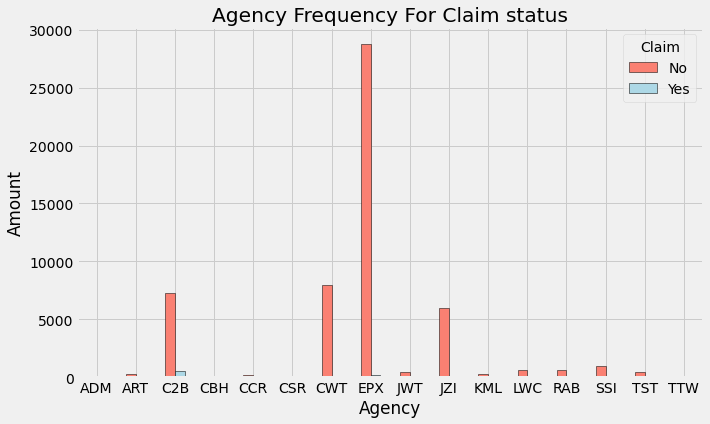

In [36]:
# Now let's visualze
pd.crosstab(df.Agency, df.Claim).plot(kind = "bar", figsize = (10,6), color = ["salmon","lightblue","lightgreen"],rot=0,ec="black")

plt.title("Agency Frequency For Claim status")
plt.ylabel("Amount")

In [37]:
pd.crosstab(df.Claim,df.Gender)

Gender,F,M,Not Specified
Claim,,,
No,8056,8270,38037
Yes,345,288,288


Text(0, 0.5, 'Amount')

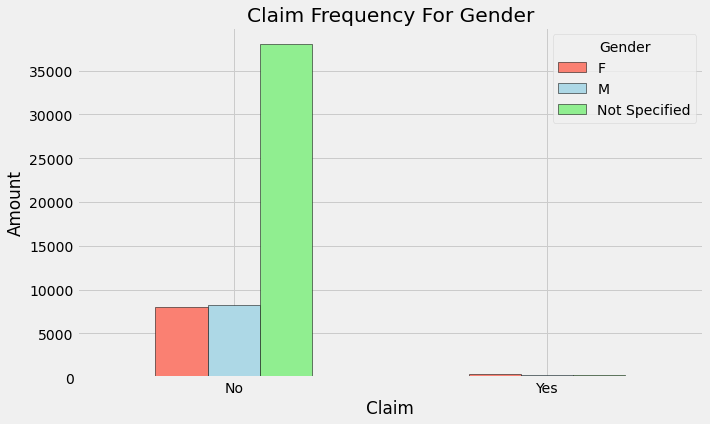

In [38]:
# Now let's visualze
pd.crosstab(df.Claim, df.Gender).plot(kind = "bar", figsize = (10,6), color = ["salmon","lightblue","lightgreen"],rot=0,ec="black")

plt.title("Claim Frequency For Gender")
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

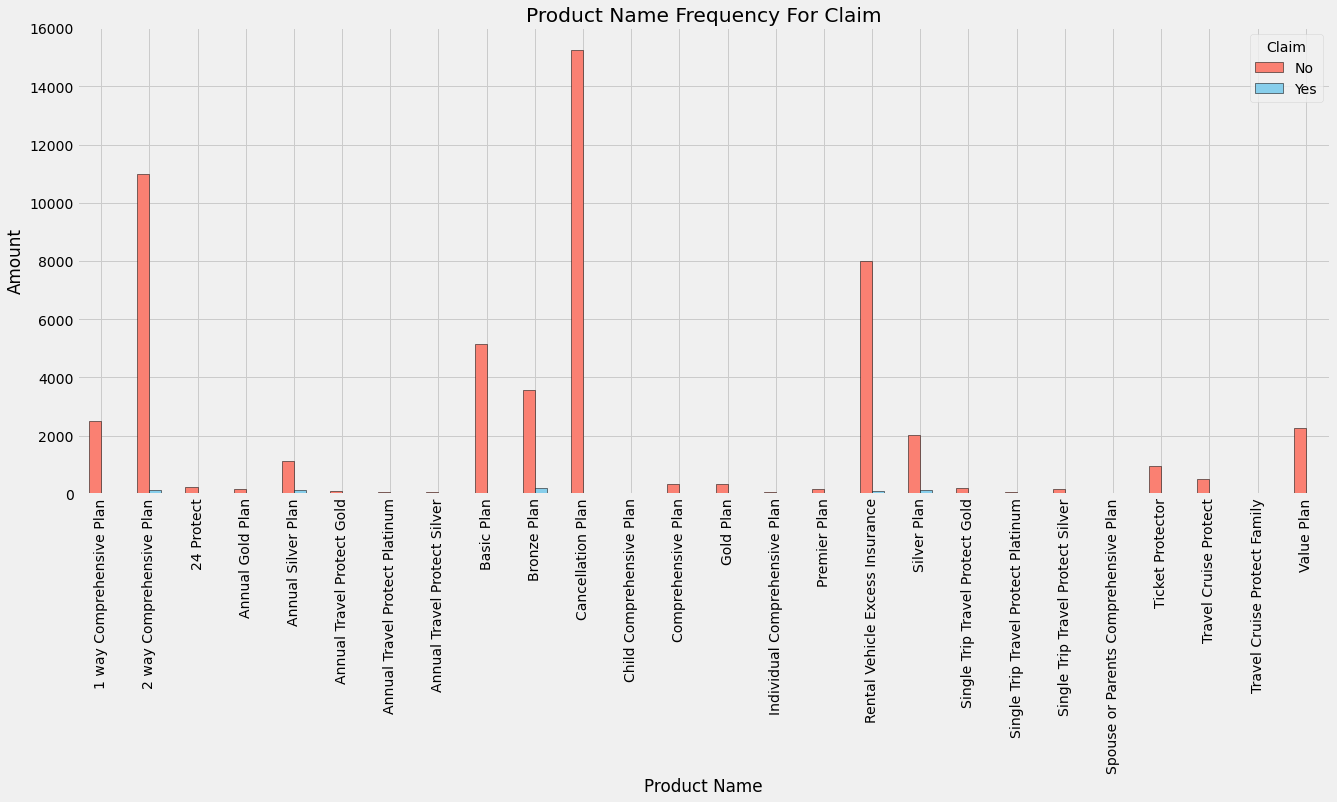

In [39]:
# Now let's visualze
pd.crosstab( df['Product Name'],df.Claim).plot(kind = "bar", figsize = (20,8), color = ["salmon","skyblue"],rot=90,ec="black")

plt.title("Product Name Frequency For Claim")
plt.ylabel("Amount")

### Data transformation

In [40]:
# convert categorical into numericals
category_col =['Agency', 'Product Name', 'Destination', 'Gender','Claim'] 
labelEncoder = preprocessing.LabelEncoder()

mapping_dict ={} 
for col in category_col: 
    df[col] = labelEncoder.fit_transform(df[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
    
print(mapping_dict)

{'Agency': {'ADM': 0, 'ART': 1, 'C2B': 2, 'CBH': 3, 'CCR': 4, 'CSR': 5, 'CWT': 6, 'EPX': 7, 'JWT': 8, 'JZI': 9, 'KML': 10, 'LWC': 11, 'RAB': 12, 'SSI': 13, 'TST': 14, 'TTW': 15}, 'Product Name': {'1 way Comprehensive Plan': 0, '2 way Comprehensive Plan': 1, '24 Protect': 2, 'Annual Gold Plan': 3, 'Annual Silver Plan': 4, 'Annual Travel Protect Gold': 5, 'Annual Travel Protect Platinum': 6, 'Annual Travel Protect Silver': 7, 'Basic Plan': 8, 'Bronze Plan': 9, 'Cancellation Plan': 10, 'Child Comprehensive Plan': 11, 'Comprehensive Plan': 12, 'Gold Plan': 13, 'Individual Comprehensive Plan': 14, 'Premier Plan': 15, 'Rental Vehicle Excess Insurance': 16, 'Silver Plan': 17, 'Single Trip Travel Protect Gold': 18, 'Single Trip Travel Protect Platinum': 19, 'Single Trip Travel Protect Silver': 20, 'Spouse or Parents Comprehensive Plan': 21, 'Ticket Protector': 22, 'Travel Cruise Protect': 23, 'Travel Cruise Protect Family': 24, 'Value Plan': 25}, 'Destination': {'ALBANIA': 0, 'ANGOLA': 1, 'ARG

In [41]:
# let's check data types in dataset
df.dtypes

Agency                    int32
Product Name              int32
Duration                float64
Destination               int32
Net Sales               float64
Commision (in value)    float64
Gender                    int32
Age                       int64
Claim                     int32
dtype: object

In [42]:
# Now we finally lookout our full final dataset
df.head()

,Agency,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,3,12,186.0,79,-29.0,9.57,0,81,0
1,3,12,186.0,79,-29.0,9.57,0,71,0
2,6,16,65.0,4,-49.5,29.70,2,32,0
3,6,16,60.0,4,-39.6,23.76,2,32,0
4,6,16,79.0,61,-19.8,11.88,2,41,0


In [43]:
df.describe()

,Agency,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
count,55284.000000,55284.000000,55284.000000,55284.000000,55284.000000,55284.000000,55284.000000,55284.000000,55284.000000
mean,6.616942,9.484335,52.719911,85.423432,42.788716,10.029162,1.541278,39.977932,0.016659
std,2.455166,6.612259,106.412379,42.581118,50.448570,20.260817,0.743120,13.509125,0.127993
min,0.000000,0.000000,0.000000,0.000000,-389.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,11.000000,56.000000,19.167500,0.000000,1.000000,34.000000,0.000000
50%,7.000000,10.000000,25.000000,91.000000,29.000000,0.000000,2.000000,36.000000,0.000000
75%,7.000000,16.000000,57.000000,118.000000,50.500000,11.550000,2.000000,45.000000,0.000000
max,15.000000,25.000000,4881.000000,148.000000,810.000000,283.500000,2.000000,118.000000,1.000000


In [44]:
# Make correlation matrix
df.corr()

,Agency,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
Agency,1.000000,0.134380,-0.061773,-0.212004,-0.228062,-0.148240,0.226413,0.114926,-0.122736
Product Name,0.134380,1.000000,-0.054539,-0.062146,-0.087513,0.265879,-0.223543,0.228897,-0.002481
Duration,-0.061773,-0.054539,1.000000,0.072391,0.407612,0.329463,-0.108646,0.008194,0.069479
Destination,-0.212004,-0.062146,0.072391,1.000000,0.086062,0.006127,-0.164580,-0.026867,0.048819
Net Sales,-0.228062,-0.087513,0.407612,0.086062,1.000000,0.683577,-0.190929,0.036790,0.131479
Commision (in value),-0.148240,0.265879,0.329463,0.006127,0.683577,1.000000,-0.253924,0.117937,0.100703
Gender,0.226413,-0.223543,-0.108646,-0.164580,-0.190929,-0.253924,1.000000,-0.152561,-0.105648
Age,0.114926,0.228897,0.008194,-0.026867,0.036790,0.117937,-0.152561,1.000000,-0.012728
Claim,-0.122736,-0.002481,0.069479,0.048819,0.131479,0.100703,-0.105648,-0.012728,1.000000


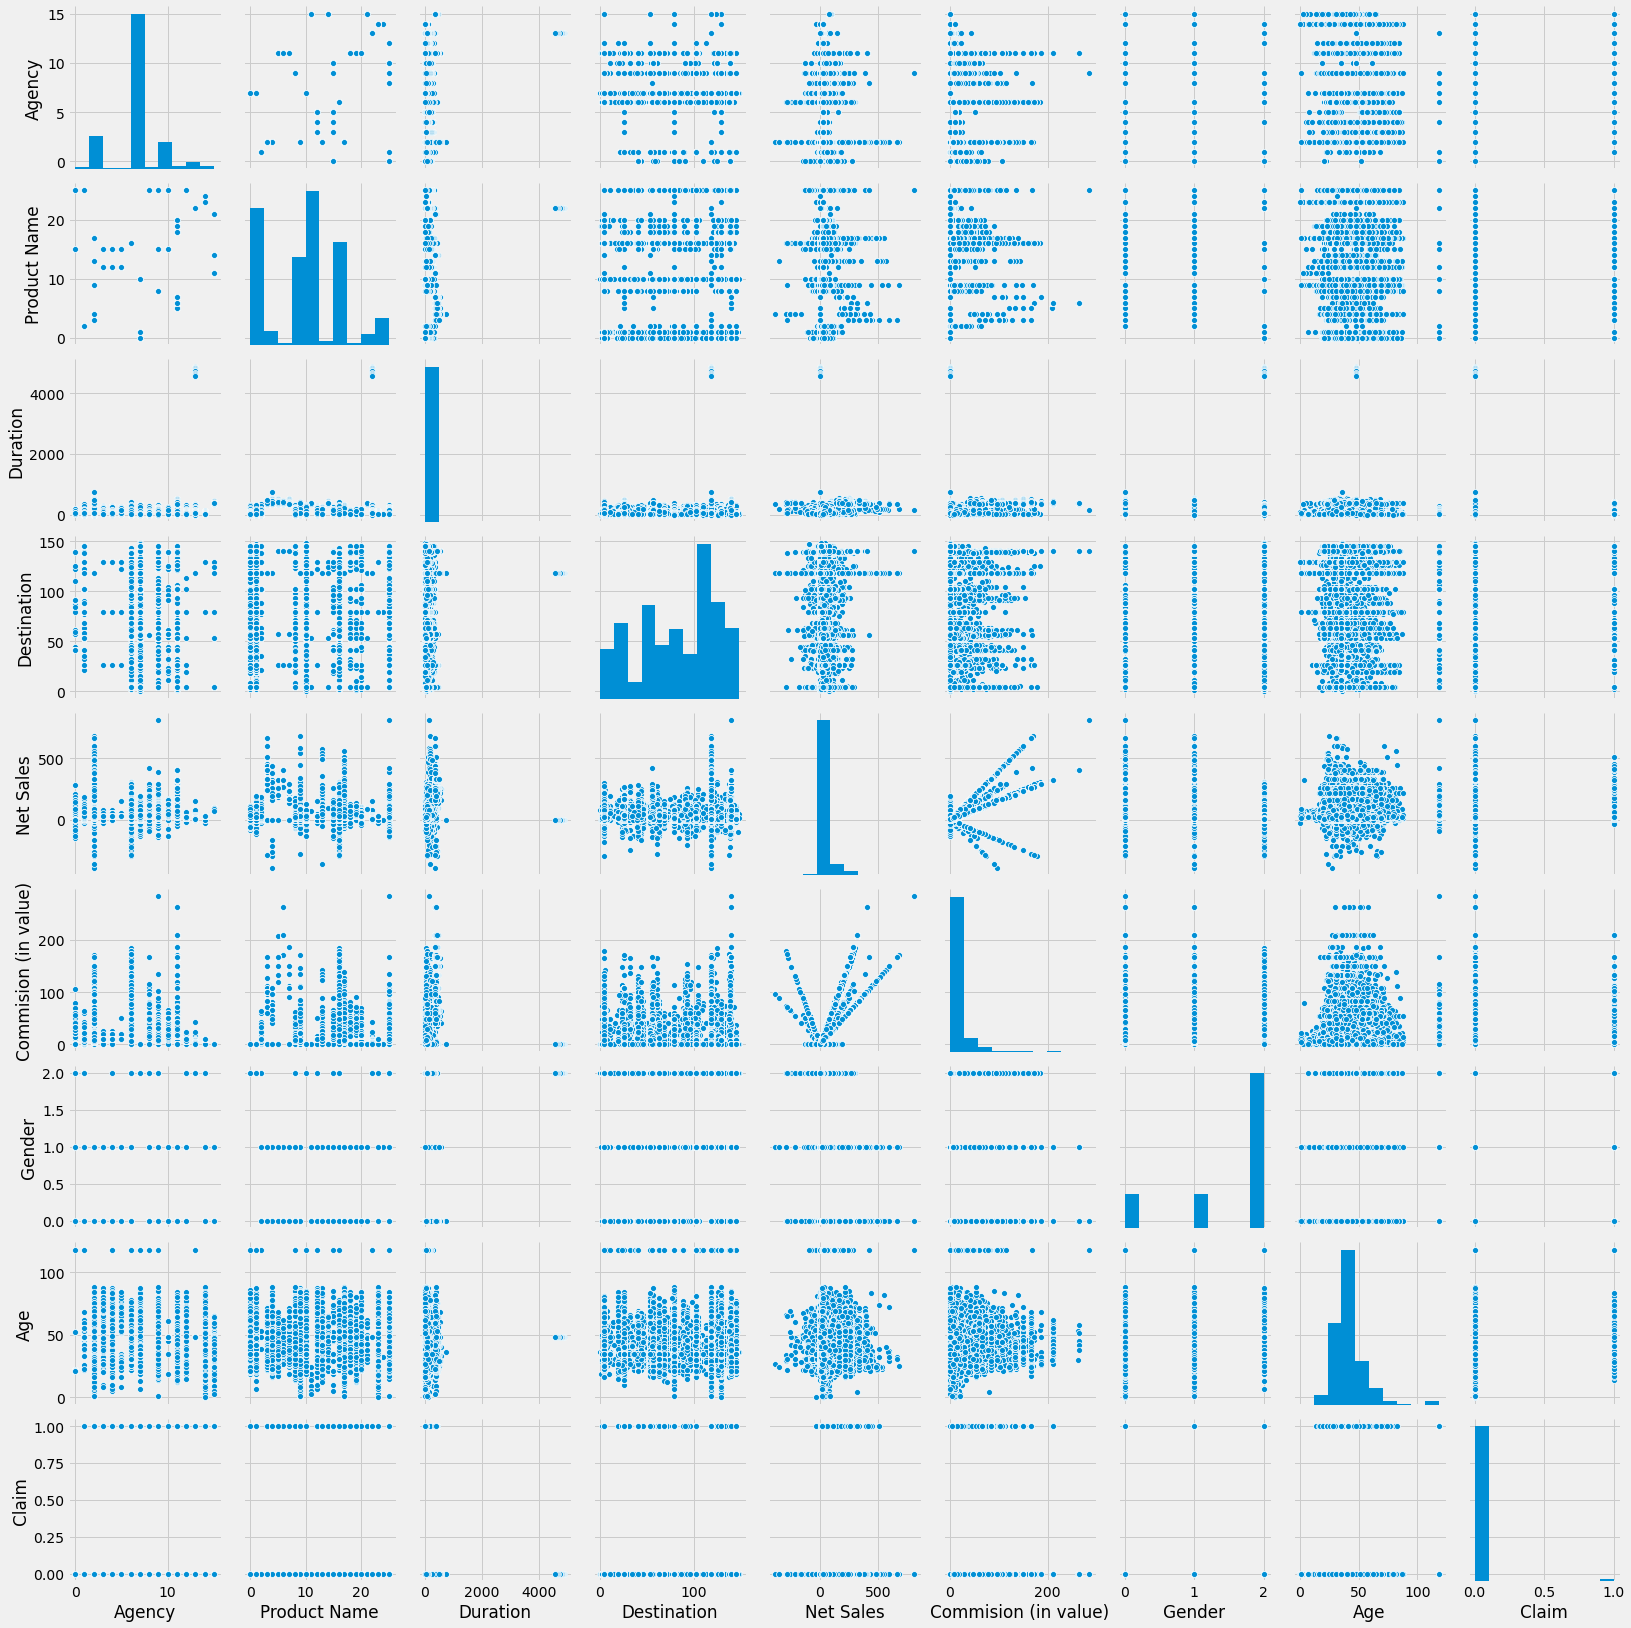

In [45]:
# let's plot pairplot for dataset
sns.pairplot(df)

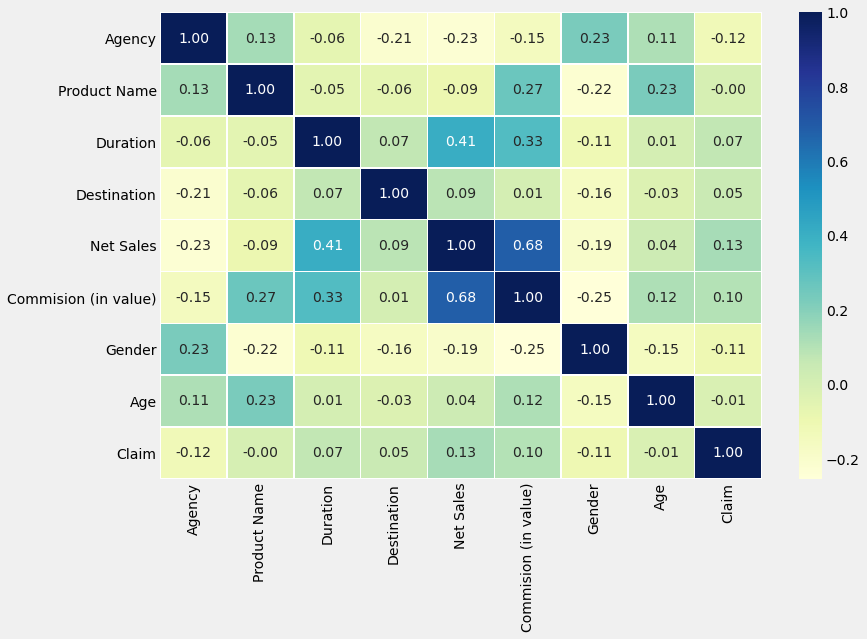

In [46]:
# Let's visualize our corrrelation matrix for better understanding
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");

> Since, our dependent variable(i.e. "Claim") is imbalnaced , so our next target is make it balaneced so that it will help for best acuuracy prediction for our business problem

### Imbalanced data

Let's make our dependent variable balanced by using SMOTE (Synthetic Minority Oversampling Technique) techique

In [48]:
# make independent and dependent features
# define a random state 
state = np.random.RandomState(42)

X = df.drop('Claim',axis=1)
y = df.Claim

In [49]:
X_outliers = state.uniform(low=0,high=1,size=(X.shape[0],X.shape[1]))

In [50]:
# print the shapes of X & Y
print(X.shape)
print(y.shape)

(55284, 8)
(55284,)


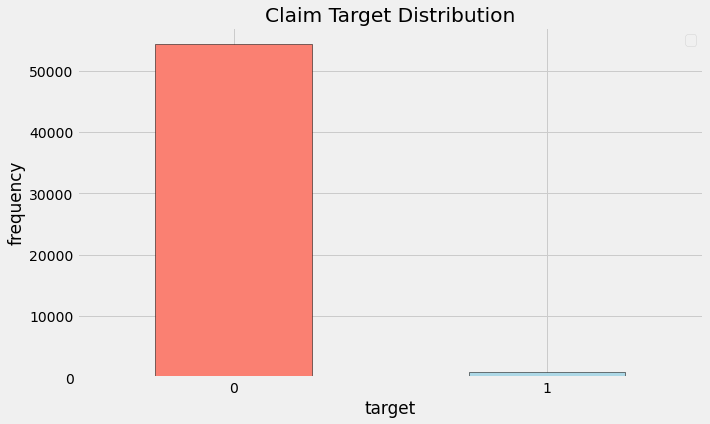

In [51]:
count_targets = pd.value_counts(df['Claim'],sort = True)
count_targets.plot(kind='bar',rot=0,color=["salmon","lightblue"],figsize = (10,6),ec="black")
plt.title("Claim Target Distribution")
plt.xlabel("target")
plt.ylabel("frequency")
plt.legend("Yes","No")

In [52]:
## get the FRAUD & GENUIN data set
Accept = df[df['Claim']==1]
Decline = df[df['Claim']==0]
print(Accept.shape,Decline.shape)

(921, 9) (54363, 9)


In [53]:
### SMOTE to handle imbalanced data set
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_res,y_res = smote.fit_sample(X,y)
print(X_res.shape,y_res.shape)

from collections import Counter
print('Original dataset shape{}'.format(Counter(y)))
print('Resampled dataset shape{}'.format(Counter(y_res)))

(108726, 8) (108726,)
Original dataset shapeCounter({0: 54363, 1: 921})
Resampled dataset shapeCounter({0: 54363, 1: 54363})


In [54]:
# splitting data into training and tesing

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

## Model Building & Evaluation

In [55]:
# 1. Logistic Regression
model = LogisticRegression(random_state=42,max_iter=200)
model.fit(X_train,y_train)
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)

print("Train Accuracy Balanced Data",np.mean(y_train==pred_train))
print("Test Accuracy Balanced Data",np.mean(y_test==pred_test))

print(classification_report(y_test,pred_test))

Train Accuracy Balanced Data 0.7479634204025858
Test Accuracy Balanced Data 0.7465203262002575
              precision    recall  f1-score   support

           0       0.72      0.81      0.76     16435
           1       0.78      0.68      0.73     16183

    accuracy                           0.75     32618
   macro avg       0.75      0.75      0.75     32618
weighted avg       0.75      0.75      0.75     32618



<AxesSubplot:>

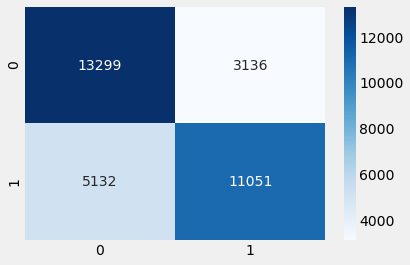

In [56]:
cm = confusion_matrix(y_test, pred_test)
# let's visualize cm2
sns.heatmap(cm,cmap= "Blues",annot = True, fmt='')

Area under the ROC curve : 0.746032


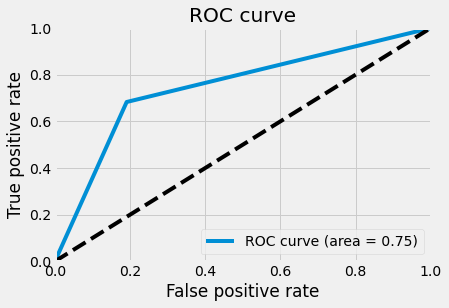

In [57]:
## Let's plot ROC(Receiver Operating Characteristics) curve :
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

# Compute ROC curve area under the curve
fpr, tpr, thresholds = roc_curve(y_test,pred_test)
roc_auc = auc(fpr,tpr) 
print("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
plt.clf
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

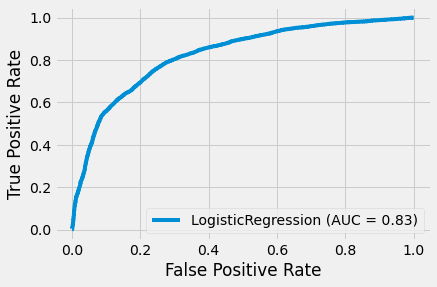

In [58]:
plot_roc_curve(model, X_test, y_test)

In [59]:
# 2. Random Forest

model2 = RandomForestClassifier(criterion='gini',random_state=42)
model2.fit(X_train,y_train)
pred_test = model2.predict(X_test)
pred_train = model2.predict(X_train)

print("Train Accuracy Balanced Data",np.mean(y_train==pred_train))
print("Test Accuracy Balanced Data",np.mean(y_test==pred_test))

print(classification_report(y_test,pred_test))

Train Accuracy Balanced Data 0.998725495348715
Test Accuracy Balanced Data 0.9706297136550371
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     16435
           1       0.96      0.98      0.97     16183

    accuracy                           0.97     32618
   macro avg       0.97      0.97      0.97     32618
weighted avg       0.97      0.97      0.97     32618



<AxesSubplot:>

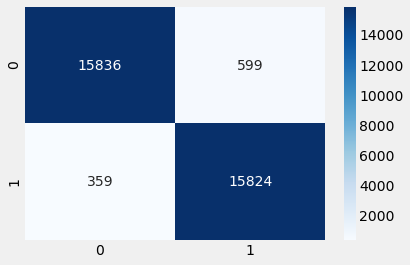

In [60]:
cm2 = confusion_matrix(y_test, pred_test)
# let's visualize cm2
sns.heatmap(cm2,cmap= "Blues",annot = True, fmt='')

Area under the ROC curve : 0.970685


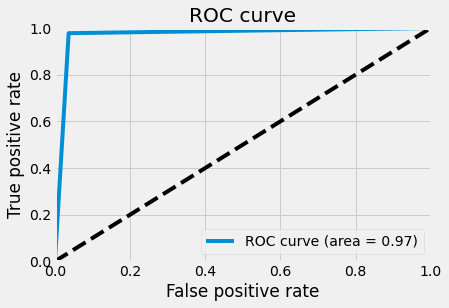

In [61]:
## Let's plot ROC(Receiver Operating Characteristics) curve :
# Compute ROC curve area under the curve
fpr, tpr, thresholds = roc_curve(y_test,pred_test)
roc_auc = auc(fpr,tpr) 
print("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
plt.clf
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

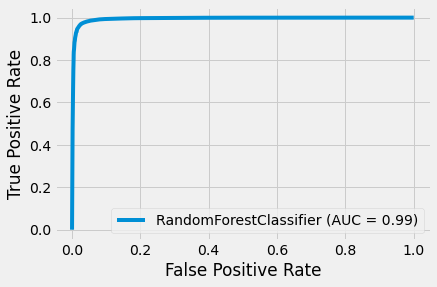

In [62]:
plot_roc_curve(model2, X_test, y_test)

In [63]:
# 3. Decision Tree

from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=42,splitter='best',min_samples_split=4,min_samples_leaf=2)
model3.fit(X_train,y_train)
pred_test = model3.predict(X_test)
pred_train = model3.predict(X_train)

print("Train Accuracy Balanced Data",np.mean(y_train==pred_train))
print("Test Accuracy Balanced Data",np.mean(y_test==pred_test))

print(classification_report(y_test,pred_test))

Train Accuracy Balanced Data 0.9873994849424502
Test Accuracy Balanced Data 0.951529830155129
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     16435
           1       0.96      0.94      0.95     16183

    accuracy                           0.95     32618
   macro avg       0.95      0.95      0.95     32618
weighted avg       0.95      0.95      0.95     32618



<AxesSubplot:>

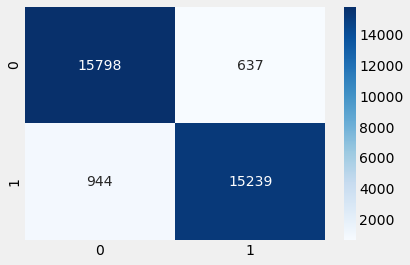

In [64]:
cm3 = confusion_matrix(y_test, pred_test)
# let's visualize cm
sns.heatmap(cm3,cmap= "Blues",annot = True, fmt='')

Area under the ROC curve : 0.951454


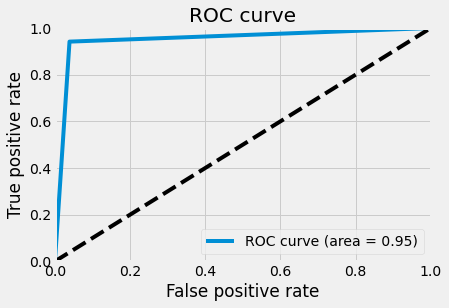

In [65]:
## Let's plot ROC(Receiver Operating Characteristics) curve :
# Compute ROC curve area under the curve
fpr, tpr, thresholds = roc_curve(y_test,pred_test)
roc_auc = auc(fpr,tpr) 
print("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
plt.clf
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

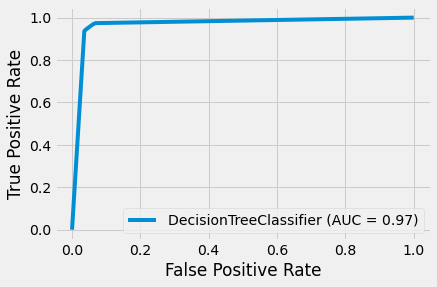

In [66]:
plot_roc_curve(model3, X_test, y_test)

In [67]:
# 4. KNN (k-nearset neighbors)

model4 = KNC(n_neighbors= 5,n_jobs=200)
model4.fit(X_train,y_train)
pred_test = model4.predict(X_test)
pred_train = model4.predict(X_train)

print("Train Accuracy Balanced Data",np.mean(y_train==pred_train))
print("Test Accuracy Balanced Data",np.mean(y_test==pred_test))

print(classification_report(y_test,pred_test))

Train Accuracy Balanced Data 0.9496899143322647
Test Accuracy Balanced Data 0.9282298117603777
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     16435
           1       0.88      0.98      0.93     16183

    accuracy                           0.93     32618
   macro avg       0.93      0.93      0.93     32618
weighted avg       0.93      0.93      0.93     32618



<AxesSubplot:>

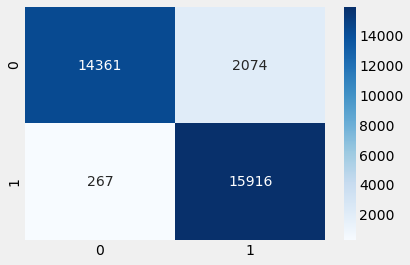

In [68]:
cm4 = confusion_matrix(y_test, pred_test)
# let's visualize cm
sns.heatmap(cm4,cmap= "Blues",annot = True, fmt='')

Area under the ROC curve : 0.928654


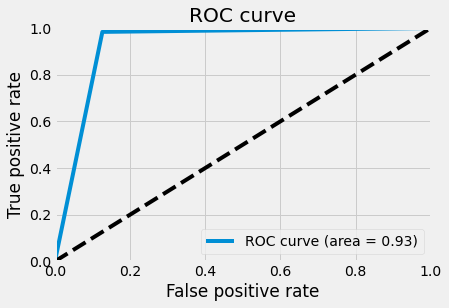

In [69]:
# Compute ROC curve area under the curve
fpr, tpr, thresholds = roc_curve(y_test,pred_test)
roc_auc = auc(fpr,tpr) 
print("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
plt.clf
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

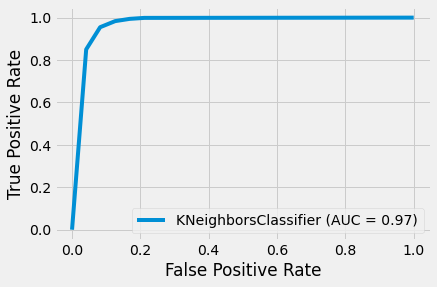

In [70]:
plot_roc_curve(model4, X_test, y_test)

In [71]:
# 5. XGBoost (eXtreme Gradient Boosting)

model5 = XGBClassifier()
model5.fit(X_train, y_train)
pred_test = model5.predict(X_test)
pred_train = model5.predict(X_train)

print("Train Accuracy Balanced Data",np.mean(y_train==pred_train))
print("Test Accuracy Balanced Data",np.mean(y_test==pred_test))

print(classification_report(y_test,pred_test))

Train Accuracy Balanced Data 0.9692279392442319
Test Accuracy Balanced Data 0.9618002330001839
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     16435
           1       0.95      0.97      0.96     16183

    accuracy                           0.96     32618
   macro avg       0.96      0.96      0.96     32618
weighted avg       0.96      0.96      0.96     32618



<AxesSubplot:>

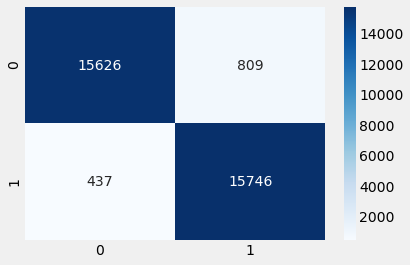

In [72]:
# Making the Confusion Matrix
cm5 = confusion_matrix(y_test, pred_test)

# let's visualize cm
sns.heatmap(cm5,cmap= "Blues",annot = True, fmt='')

Area under the ROC curve : 0.961886


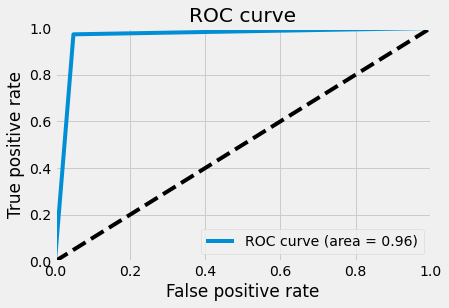

In [73]:
## Let's plot ROC(Receiver Operating Characteristics) curve :

# Compute ROC curve area under the curve
fpr, tpr, thresholds = roc_curve(y_test,pred_test)
roc_auc = auc(fpr,tpr) 
print("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
plt.clf
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

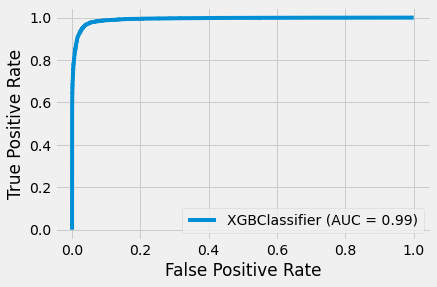

In [74]:
plot_roc_curve(model5, X_test, y_test)

## Best model selection

From building the several model "Rondom Forest" is giving the best accuracy, so we conclude that this is our best fit model for model predictions and now we will save this final model for model predictons for deployment.

In [75]:
# Saving model to disk
import pickle
pickle.dump(model2, open('Travel_Claims_model.pkl','wb'))

#### Now final task let's make predictions

In [77]:
# load the model and make predictions
model = pickle.load(open('Travel_Claims_model.pkl','rb'))
print(model.predict([[2,13,80,69,20,5,1,45]]))

[1]
